# Модуль 3  Подбор переменных и алгоритмов для модели

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. ВЫБОР ПЕРЕМЕННЫХ ИЗ ИСХОДНОГО НАБОРА ДАННЫХ: ОБОСНОВАНИЕ (ЛОГИКА, АНАЛИЗ ДАННЫХ)

In [129]:
df = pd.read_csv('df_rolled.csv')
df

,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16,filename,index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SOP1.dat,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SOP1.dat,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SOP1.dat,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SOP1.dat,4
4,2.0,11.6,190.2,27.2,14.2,15.6,0.0,0.0,255.0,149.8,59.4,58.8,159.0,239.8,12.2,17.4,SOP1.dat,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,0.0,0.0,0.0,167.0,113.6,23.6,0.0,0.0,11.8,255.0,0.0,5.0,33.2,0.0,0.0,0.0,SOP3.dat,1034
3115,0.0,0.0,0.0,155.6,101.0,27.4,0.0,0.0,12.6,255.0,0.0,7.8,23.0,0.0,0.0,0.0,SOP3.dat,1035
3116,0.0,0.0,0.0,145.0,86.0,32.4,0.0,0.0,10.0,255.0,0.0,13.2,14.4,0.0,0.2,0.0,SOP3.dat,1036
3117,0.0,0.0,0.0,137.4,69.4,38.4,0.0,0.0,11.0,255.0,0.0,18.6,6.8,0.0,0.2,0.0,SOP3.dat,1037


Загрузка целевых переменных

In [130]:
target_1 = pd.read_csv('data/target1.csv')
target_1['file'] = ['target1'] * len(target_1)
target_1['link'] = ['SOP1.dat'] * len(target_1)
target_2 = pd.read_csv('data/target2.csv')
target_2['file'] = ['target2'] * len(target_2)
target_2['link'] = ['SOP2.dat'] * len(target_2)
target_3 = pd.read_csv('data/target3.csv')
target_3['file'] = ['target3'] * len(target_3)
target_3['link'] = ['SOP3.dat'] * len(target_3)
target = pd.concat([target_1, target_2, target_3])
target[['Начало дефекта', 'Длина дефекта']].iloc[target[['Начало дефекта', 'Длина дефекта']].dropna().index] = target[['Начало дефекта', 'Длина дефекта']].iloc[target[['Начало дефекта', 'Длина дефекта']].dropna().index].astype('int')
print(target.shape)
target.head(10)

(21, 7)


C:\Users\Vladlen\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,Начало дефекта,Длина дефекта,Высота дефекта,Тип дефекта,Сторона,file,link
0,51,42.0,7,L,A,target1,SOP1.dat
1,200,40.0,6,L,B,target1,SOP1.dat
2,278,39.0,4,L,A,target1,SOP1.dat
3,365,43.0,6,L,B,target1,SOP1.dat
4,460,27.0,5,L,A,target1,SOP1.dat
5,845,36.0,4,L,B,target1,SOP1.dat
6,959,62.0,6,L,A,target1,SOP1.dat
7,141,NaN,4,T,,target1,SOP1.dat
0,178,37.0,6,L,B,target2,SOP2.dat
1,258,38.0,4,L,A,target2,SOP2.dat


In [131]:
target['Тип дефекта'].unique()

array(['L', 'T'], dtype=object)

In [132]:
target['Сторона'].unique()

array(['A', 'B', ' '], dtype=object)

Соединение признаков и целевых переменных

In [133]:
df.loc[:, 'defect_type'] = [-1] * len(df)
df.loc[:, 'side'] = [-1] * len(df)
for k in range(len(target)):
    row = target.iloc[k]
    if row['Тип дефекта'] != 'T':
        defect_start = row['Начало дефекта'] + 50
        defect_length = row['Длина дефекта'].astype('int')
        defect_end = defect_start + row['Длина дефекта'].astype('int')
        idx = df[(df.filename == row.link) & (df[df.filename == row.link]['index'] > defect_start) & (df[df.filename == row.link]['index'] <= defect_end)].index
        if defect_end > df[df.filename == row.link]['index'].iloc[-1]:
            idx = [i for i in range(defect_start, len(df[df.filename == row.link]))]
            defect_length = df[df.filename == row.link].iloc[-1]['index'] - defect_start
            df.loc[idx, 'side'] = ['A'] * defect_length if row['Сторона'] == 'A' else ['B'] * defect_length
            df.loc[idx, 'defect_type'] = ['L'] * defect_length
        else:
            idx = df[(df.filename == row.link) & (df[df.filename == row.link]['index'] > defect_start) & (df[df.filename == row.link]['index'] <= defect_end)].index
            df.loc[idx, 'side'] = ['A'] * defect_length if row['Сторона'] == 'A' else ['B'] * defect_length
            df.loc[idx, 'defect_type'] = ['L'] * defect_length
    else:
        defect_start = row['Начало дефекта'] + 50
        defect_length = 1
        defect_end = defect_start + defect_length
        idx = df[(df.filename == row.link) & (df[df.filename == row.link]['index'] > defect_start) & (df[df.filename == row.link]['index'] <= defect_end)].index
        df.loc[idx, 'side'] = ['A'] * defect_length if row['Сторона'] == 'A' else ['B'] * defect_length
        df.loc[idx, 'defect_type'] = ['T'] * defect_length

In [134]:
df.side.unique(), df.defect_type.unique() 

(array([-1, 'A', 'B'], dtype=object), array([-1, 'L', 'T'], dtype=object))

In [43]:
df.side.value_counts(), df.defect_type.value_counts() 

(-1    2462
 B      402
 A      255
 Name: side, dtype: int64,
 -1    2462
 L      654
 T        3
 Name: defect_type, dtype: int64)

<AxesSubplot:xlabel='index', ylabel='schema_3'>

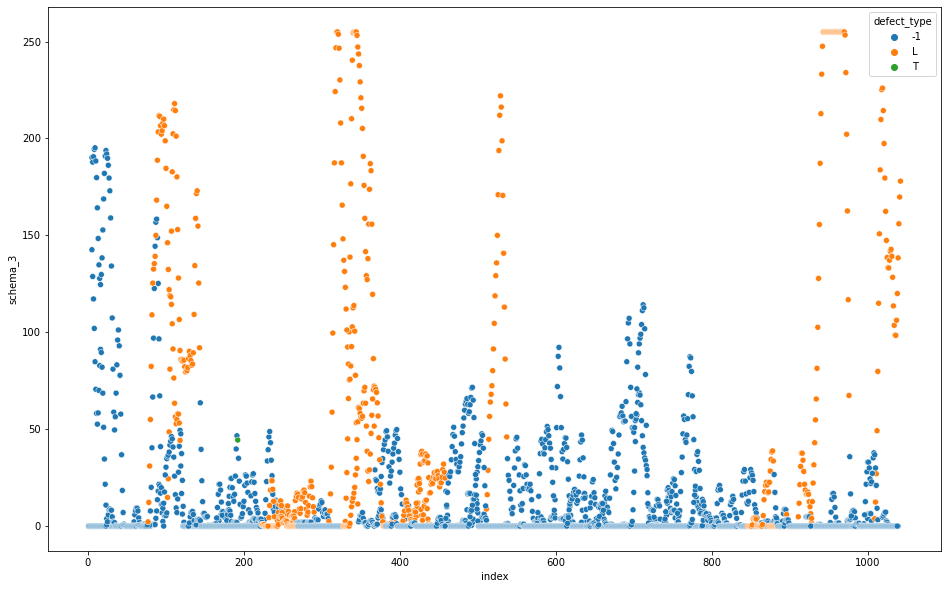

In [47]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_3', data=df, hue='defect_type')

<AxesSubplot:xlabel='index', ylabel='schema_6'>

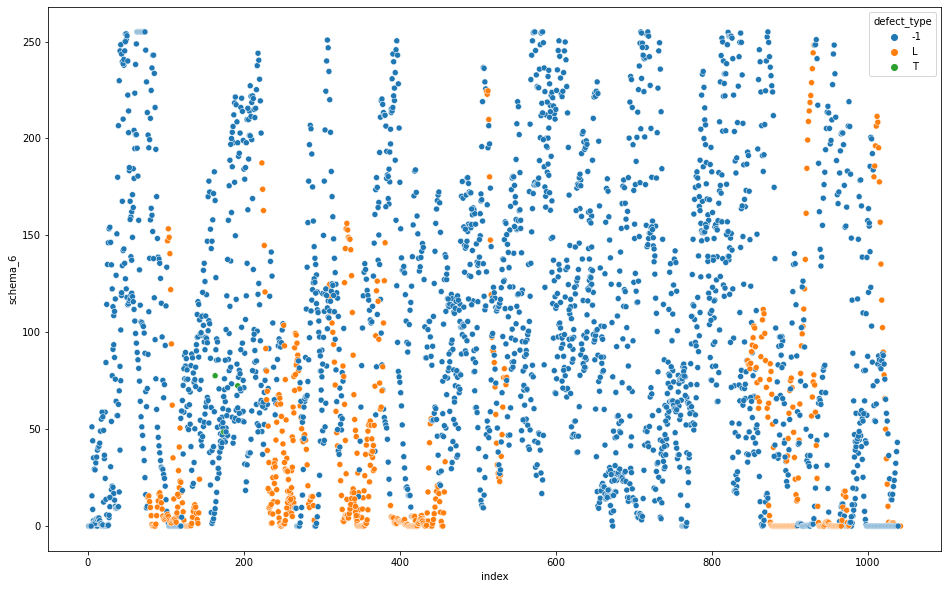

In [50]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_6', data=df, hue='defect_type')

<p> На основании корреляционного анализа схем прозвучивания, представленного в модуле 2, и целевой переменной было принято решение использовать для предсказания: </p> 
<p> - продольных дефектов со стороны А схемы 3 (эхо-метод) и 6 (теневой метод), </p> 
<p> - со стороны B - схемы 4 (эхо-метод) и 5 (теневой метод). </p>
<p> Для поперченых дефектов ... 

## 2. ВЫБОР И ПОСТРОЕНИЕ НОВЫХ ПЕРЕМЕННЫХ; ТЕСТИРОВАНИЕ ЗНАЧИМОСТИ ВЫБРАННЫХ ПЕРЕМЕННЫХ

В качестве новых переменных предлагается добавить сдвиг на 1 и 2 шага в каждую сторону для *выбранных* схем

In [57]:
l_schemas = ['schema_3', 'schema_6', 'schema_4', 'schema_5']
df_train_l = df[l_schemas + ['index', 'filename', 'defect_type', 'side']]
for schema in l_schemas:
    df_train_l[f'{schema}_lag_1'] = df_train_l[schema].shift(1)
    df_train_l[f'{schema}_lag_2'] = df_train_l[schema].shift(2)
    df_train_l[f'{schema}_lag_-1'] = df_train_l[schema].shift(-1)
    df_train_l[f'{schema}_lag_-2'] = df_train_l[schema].shift(-2)
df_train_l.fillna(value=0, inplace=True)

C:\Users\Vladlen\AppData\Local\Temp/ipykernel_15208/1429235135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_l[f'{schema}_lag_1'] = df_train_l[schema].shift(1)
C:\Users\Vladlen\AppData\Local\Temp/ipykernel_15208/1429235135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_l[f'{schema}_lag_2'] = df_train_l[schema].shift(2)
C:\Users\Vladlen\AppData\Local\Temp/ipykernel_15208/1429235135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [58]:
df_train_l

,schema_3,schema_6,schema_4,schema_5,index,filename,defect_type,side,schema_3_lag_1,schema_3_lag_2,...,schema_6_lag_-1,schema_6_lag_-2,schema_4_lag_1,schema_4_lag_2,schema_4_lag_-1,schema_4_lag_-2,schema_5_lag_1,schema_5_lag_2,schema_5_lag_-1,schema_5_lag_-2
0,0.0,0.0,0.0,0.0,1,SOP1.dat,-1,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2,SOP1.dat,-1,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3,SOP1.dat,-1,-1,0.0,0.0,...,0.0,15.6,0.0,0.0,0.0,27.2,0.0,0.0,0.0,14.2
3,0.0,0.0,0.0,0.0,4,SOP1.dat,-1,-1,0.0,0.0,...,15.6,8.6,0.0,0.0,27.2,27.8,0.0,0.0,14.2,9.6
4,190.2,15.6,27.2,14.2,5,SOP1.dat,-1,-1,0.0,0.0,...,8.6,2.8,0.0,0.0,27.8,28.6,0.0,0.0,9.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,0.0,23.6,167.0,113.6,1034,SOP3.dat,-1,-1,0.0,0.0,...,27.4,32.4,177.8,183.2,155.6,145.0,124.2,123.8,101.0,86.0
3115,0.0,27.4,155.6,101.0,1035,SOP3.dat,-1,-1,0.0,0.0,...,32.4,38.4,167.0,177.8,145.0,137.4,113.6,124.2,86.0,69.4
3116,0.0,32.4,145.0,86.0,1036,SOP3.dat,-1,-1,0.0,0.0,...,38.4,43.2,155.6,167.0,137.4,133.4,101.0,113.6,69.4,55.8
3117,0.0,38.4,137.4,69.4,1037,SOP3.dat,-1,-1,0.0,0.0,...,43.2,0.0,145.0,155.6,133.4,0.0,86.0,101.0,55.8,0.0


## 3. АРГУМЕНТИРОВАННЫЙ ВЫБОР АЛГОРИТМА ДЛЯ КЛАСТЕРИЗАЦИИ



In [122]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [116]:
columns = [col for col in df_train_l.columns if 'schema' in col]
clustering_models = [KMeans(n_clusters=2, random_state=42, max_iter=1), DBSCAN(eps=3, min_samples=3), 
                     AgglomerativeClustering(n_clusters=2), SpectralClustering(n_clusters=2)]
clustering_modelnames = ['KMeans', 'DBSCAN', 'AgglomerativeClustering', 'SpectralClustering']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train_l[columns].values)
for k in range(4):
    model = clustering_models[k]
    labels = model.fit_predict(df_scaled)
    print('Model: ', clustering_modelnames[k])
    print(silhouette_score(df_train_l[columns].values, labels))
    df_train_l[f'clusters_{clustering_modelnames[k]}'] = labels

Model:  KMeans
0.2781632399991992
Model:  DBSCAN
0.18240984491632947
Model:  AgglomerativeClustering
0.34713726593543304
Model:  SpectralClustering
0.4566039190831134


In [128]:
df_train_l.to_csv('df_train_l.csv', index=False)

<AxesSubplot:xlabel='index', ylabel='schema_6'>

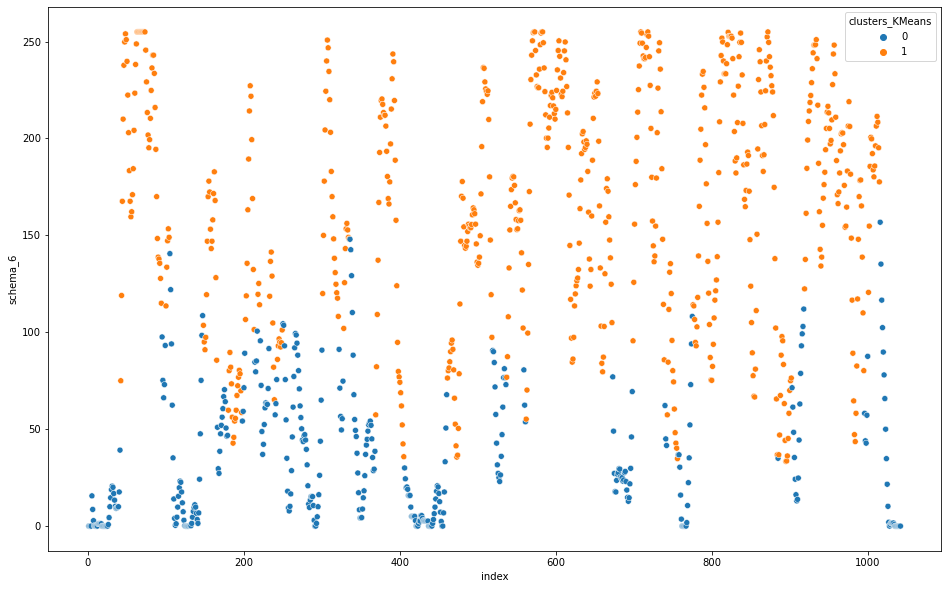

In [109]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_6', data=df_train_l[df_train_l.filename=='SOP1.dat'], hue='clusters_KMeans')

<AxesSubplot:xlabel='index', ylabel='schema_6'>

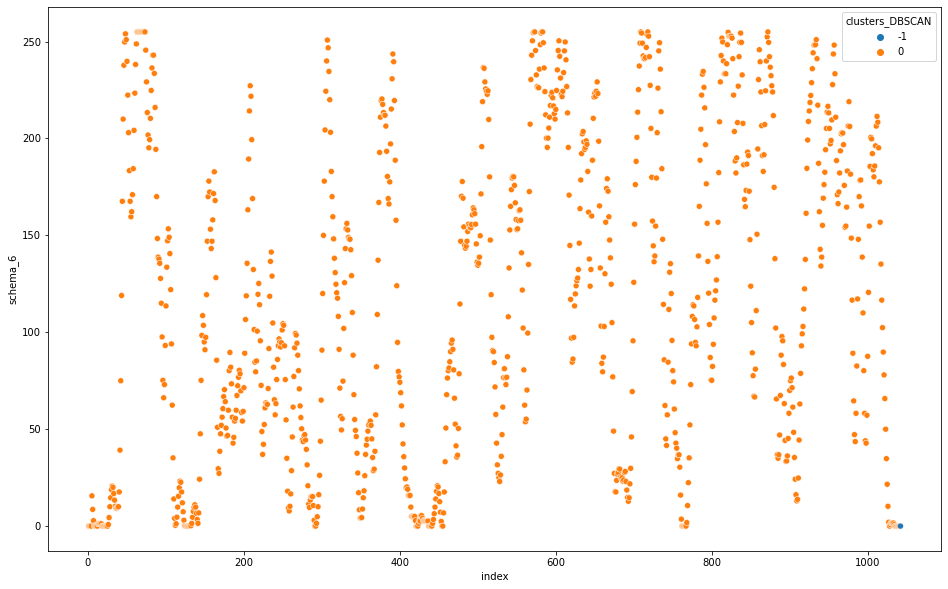

In [120]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_6', data=df_train_l[df_train_l.filename=='SOP1.dat'], hue='clusters_DBSCAN', palette='tab10')

<AxesSubplot:xlabel='index', ylabel='schema_6'>

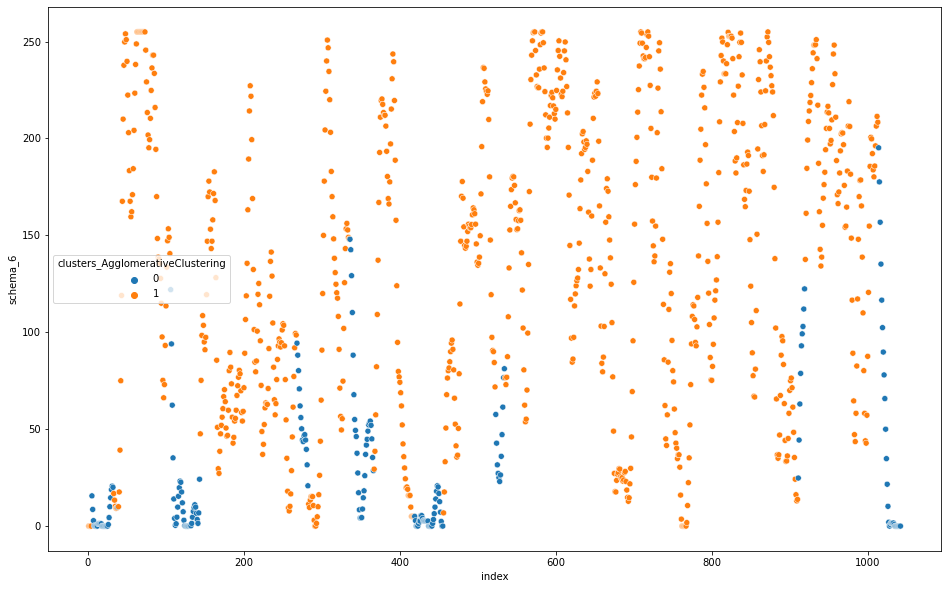

In [121]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_6', data=df_train_l[df_train_l.filename=='SOP1.dat'], hue='clusters_AgglomerativeClustering')

<AxesSubplot:xlabel='index', ylabel='schema_6'>

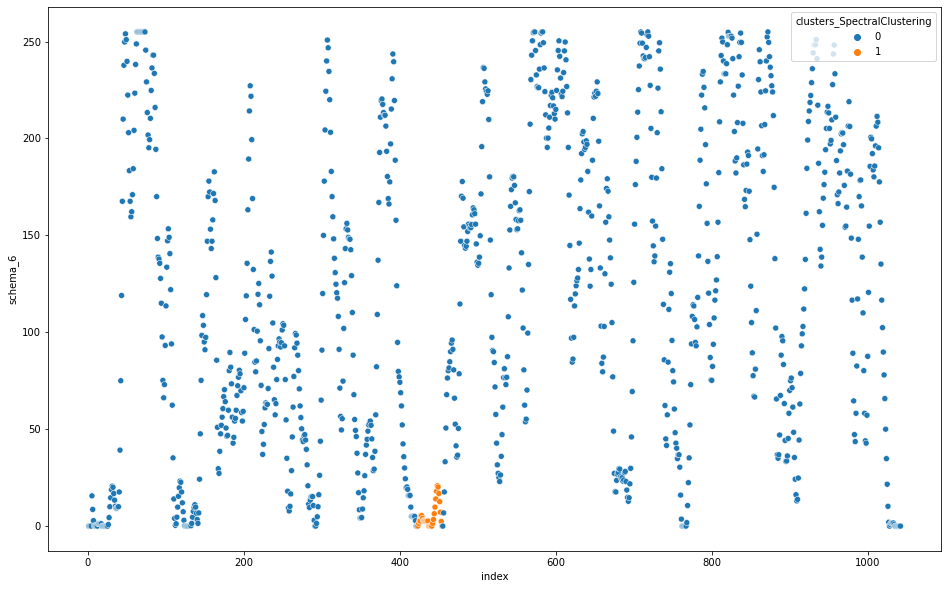

In [123]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='index', y='schema_6', data=df_train_l[df_train_l.filename=='SOP1.dat'], hue='clusters_SpectralClustering')

На основании вышеприведенного визуального анализа и подсчета метрики для кластеризации были выбраны алгоритмы KMeans и AgglomerativeClustering

In [126]:
df_clusters = df_train_l['clusters_KMeans']
df_clusters.to_csv('clustering.csv', index=False)